# Convolutional Neural Networks

## Machine learning on images

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## MNIST

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

11501568/11490434 [==============================] - 1s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

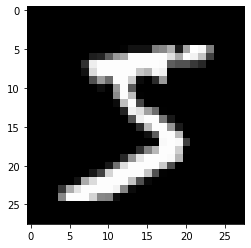

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [8]:
X_train.shape

(60000, 784)

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0


In [11]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [12]:
from keras.utils.np_utils import to_categorical

In [13]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [14]:
y_train[0]

5

In [15]:
y_train_cat[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [16]:
y_train_cat.shape

(60000, 10)

In [17]:
y_test_cat.shape

(10000, 10)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512, input_dim = 28*28, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])




In [21]:
h = model.fit(X_train, y_train_cat, batch_size = 128, epochs = 10, verbose = 1, validation_split=0.3 )

Epoch 1/10
329/329 [==============================] - 2s 6ms/step - loss: 0.3347 - accuracy: 0.8991 - val_loss: 0.1387 - val_accuracy: 0.9582
Epoch 2/10
329/329 [==============================] - 2s 6ms/step - loss: 0.1102 - accuracy: 0.9666 - val_loss: 0.2282 - val_accuracy: 0.9398
Epoch 3/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0723 - accuracy: 0.9781 - val_loss: 0.1318 - val_accuracy: 0.9614
Epoch 4/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0515 - accuracy: 0.9836 - val_loss: 0.1229 - val_accuracy: 0.9683
Epoch 5/10
329/329 [==============================] - 2s 7ms/step - loss: 0.0384 - accuracy: 0.9886 - val_loss: 0.1058 - val_accuracy: 0.9735
Epoch 6/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0314 - accuracy: 0.9910 - val_loss: 0.1250 - val_accuracy: 0.9717
Epoch 7/10
329/329 [==============================] - 2s 6ms/step - loss: 0.0244 - accuracy: 0.9922 - val_loss: 0.1199 - val_accuracy: 0.9748
Epoch 

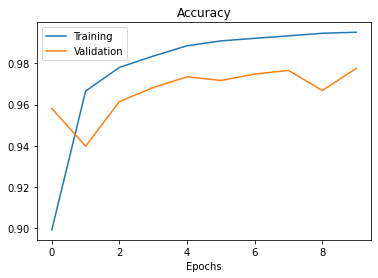

In [22]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs');

In [23]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
test_accuracy

313/313 [==============================] - 0s 675us/step - loss: 0.1176 - accuracy: 0.9780


0.9779999852180481

## Tensor Math

In [24]:
A = np.random.randint(10, size=(2, 3, 4, 5))
B = np.random.randint(10, size=(2, 3))

In [25]:
A

array([[[[0, 7, 7, 6, 9],
         [4, 7, 3, 8, 9],
         [1, 1, 4, 3, 6],
         [7, 2, 4, 3, 1]],

        [[7, 1, 4, 5, 1],
         [2, 7, 4, 1, 5],
         [2, 6, 4, 3, 9],
         [1, 5, 8, 1, 4]],

        [[8, 5, 2, 0, 5],
         [5, 2, 2, 6, 2],
         [8, 9, 5, 2, 2],
         [8, 7, 1, 1, 0]]],


       [[[3, 8, 2, 7, 7],
         [0, 5, 5, 4, 9],
         [0, 3, 6, 2, 1],
         [3, 8, 1, 1, 7]],

        [[6, 3, 6, 9, 8],
         [7, 8, 2, 0, 0],
         [3, 4, 2, 5, 7],
         [5, 5, 0, 4, 2]],

        [[5, 7, 1, 6, 7],
         [3, 8, 0, 9, 2],
         [0, 2, 8, 2, 0],
         [6, 2, 6, 4, 2]]]])

In [27]:
A[0, 1, 0, 3]

5

In [28]:
B

array([[9, 2, 5],
       [3, 4, 1]])

## A random colored image

In [30]:
img = np.random.randint(255, size=(4, 4, 3), dtype='uint8')
img

array([[[ 94,  23,  46],
        [138,  79, 122],
        [158, 112, 167],
        [138, 212, 106]],

       [[ 27,  67, 112],
        [254,  19,  20],
        [198, 206,  17],
        [ 34,  72,  50]],

       [[179, 105,  81],
        [213,   7, 210],
        [148, 112,  91],
        [ 15, 108, 226]],

       [[ 67, 131,  24],
        [117,   4, 236],
        [220, 225, 208],
        [127, 212, 120]]], dtype=uint8)

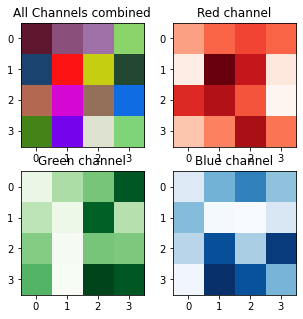

In [31]:
plt.figure(figsize=(5, 5))
plt.subplot(221)
plt.imshow(img)
plt.title("All Channels combined")

plt.subplot(222)
plt.imshow(img[:, : , 0], cmap='Reds')
plt.title("Red channel")

plt.subplot(223)
plt.imshow(img[:, : , 1], cmap='Greens')
plt.title("Green channel")

plt.subplot(224)
plt.imshow(img[:, : , 2], cmap='Blues')
plt.title("Blue channel");

## Tensor operations

In [32]:
2*A

array([[[[ 0, 14, 14, 12, 18],
         [ 8, 14,  6, 16, 18],
         [ 2,  2,  8,  6, 12],
         [14,  4,  8,  6,  2]],

        [[14,  2,  8, 10,  2],
         [ 4, 14,  8,  2, 10],
         [ 4, 12,  8,  6, 18],
         [ 2, 10, 16,  2,  8]],

        [[16, 10,  4,  0, 10],
         [10,  4,  4, 12,  4],
         [16, 18, 10,  4,  4],
         [16, 14,  2,  2,  0]]],


       [[[ 6, 16,  4, 14, 14],
         [ 0, 10, 10,  8, 18],
         [ 0,  6, 12,  4,  2],
         [ 6, 16,  2,  2, 14]],

        [[12,  6, 12, 18, 16],
         [14, 16,  4,  0,  0],
         [ 6,  8,  4, 10, 14],
         [10, 10,  0,  8,  4]],

        [[10, 14,  2, 12, 14],
         [ 6, 16,  0, 18,  4],
         [ 0,  4, 16,  4,  0],
         [12,  4, 12,  8,  4]]]])

In [33]:
A + A

array([[[[ 0, 14, 14, 12, 18],
         [ 8, 14,  6, 16, 18],
         [ 2,  2,  8,  6, 12],
         [14,  4,  8,  6,  2]],

        [[14,  2,  8, 10,  2],
         [ 4, 14,  8,  2, 10],
         [ 4, 12,  8,  6, 18],
         [ 2, 10, 16,  2,  8]],

        [[16, 10,  4,  0, 10],
         [10,  4,  4, 12,  4],
         [16, 18, 10,  4,  4],
         [16, 14,  2,  2,  0]]],


       [[[ 6, 16,  4, 14, 14],
         [ 0, 10, 10,  8, 18],
         [ 0,  6, 12,  4,  2],
         [ 6, 16,  2,  2, 14]],

        [[12,  6, 12, 18, 16],
         [14, 16,  4,  0,  0],
         [ 6,  8,  4, 10, 14],
         [10, 10,  0,  8,  4]],

        [[10, 14,  2, 12, 14],
         [ 6, 16,  0, 18,  4],
         [ 0,  4, 16,  4,  0],
         [12,  4, 12,  8,  4]]]])

In [34]:
A.shape

(2, 3, 4, 5)

In [35]:
B.shape

(2, 3)

In [37]:
np.tensordot(A, B, axes=([0,1], [0,1]))

array([[ 92, 133, 112, 127, 168],
       [ 96, 142,  68, 125, 130],
       [ 65,  93, 103,  71, 113],
       [140, 109,  66,  57,  48]])

In [38]:
np.tensordot(A, B, axes=([0], [0])).shape

(3, 4, 5, 3)

## Image filters with convolutions

In [40]:
from scipy.ndimage.filters import convolve
from scipy.signal import convolve2d
from scipy import misc

In [41]:
img = misc.ascent()

In [42]:
img.shape

(512, 512)

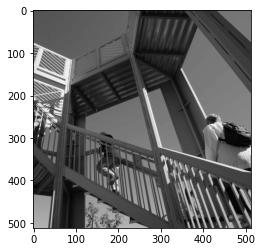

In [43]:
plt.imshow(img, cmap='gray');

In [44]:
h_kernel = np.array([[ 1,  2,  1],
                     [ 0,  0,  0],
                     [-1, -2, -1]])

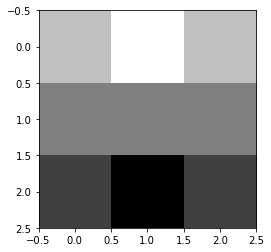

In [45]:
plt.imshow(h_kernel, cmap='gray');

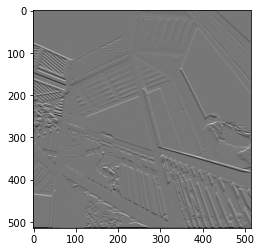

In [46]:
res = convolve2d(img, h_kernel)

plt.imshow(res, cmap='gray');

## Convolutional neural networks

In [48]:
from tensorflow.keras.layers import Conv2D

In [49]:
img.shape

(512, 512)

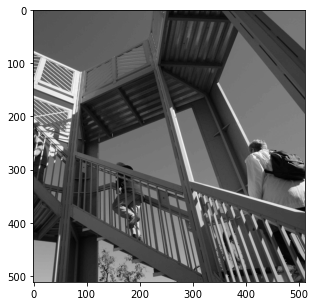

In [50]:
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray');

In [51]:
img_tensor = img.reshape((1, 512, 512, 1))

In [52]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [53]:
img_pred_tensor = model.predict(img_tensor)

In [54]:

img_pred_tensor.shape

(1, 255, 510, 1)

In [55]:
img_pred = img_pred_tensor[0, :, :, 0]

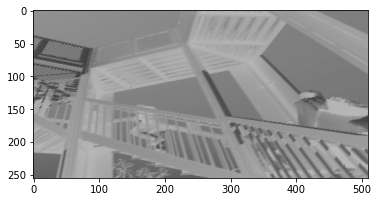

In [56]:
plt.imshow(img_pred, cmap='gray');

In [58]:
weights = model.get_weights()

In [59]:
weights[0].shape

(3, 3, 1, 1)

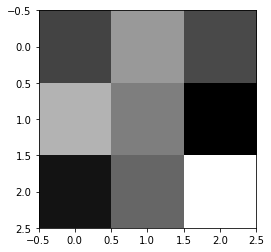

In [60]:
plt.imshow(weights[0][:, :, 0, 0], cmap='gray');

In [61]:
weights[0] = np.ones(weights[0].shape)

In [62]:
model.set_weights(weights)

In [63]:
img_pred_tensor = model.predict(img_tensor)

In [64]:
img_pred = img_pred_tensor[0, :, :, 0]

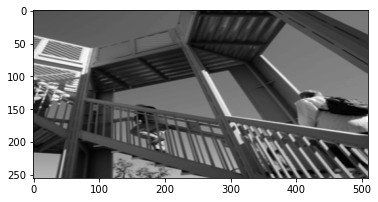

In [65]:
plt.imshow(img_pred, cmap='gray');

In [66]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

In [67]:
img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

## Pooling layers

In [68]:
from tensorflow.keras.layers import MaxPool2D, AvgPool2D

In [70]:
model = Sequential()
model.add(MaxPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

In [71]:
img_pred = model.predict(img_tensor)[0, :, :, 0]

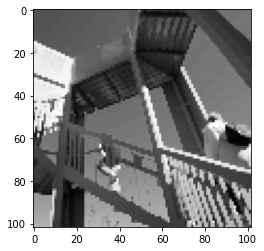

In [72]:
plt.imshow(img_pred, cmap='gray')

In [73]:
model = Sequential()
model.add(AvgPool2D((5, 5), input_shape=(512, 512, 1)))
model.compile('adam', 'mse')

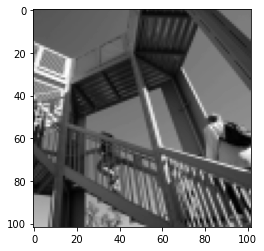

In [74]:
img_pred = model.predict(img_tensor)[0, :, :, 0]
plt.imshow(img_pred, cmap='gray');

## Final architecture

In [75]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [76]:
X_train.shape

(60000, 28, 28, 1)

In [77]:
from tensorflow.keras.layers import Flatten, Activation

In [78]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [80]:
model.summary()
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
activation (Activation)      (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [81]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0691 - accuracy: 0.9781


[0.06905575841665268, 0.9781000018119812]

## Exercise 1

In [87]:
(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [88]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Activation('relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [89]:
model.summary()
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation (Activation)      (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

In [90]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 1s 3ms/step - loss: 0.0872 - accuracy: 0.9725


[0.08716949075460434, 0.9725000262260437]

## Exercise 2

In [92]:
from keras.datasets import cifar10

In [94]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 18s 0us/step


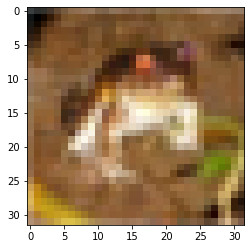

In [95]:
plt.imshow(X_train[0], cmap='gray')

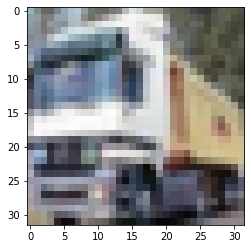

In [96]:
plt.imshow(X_train[1], cmap='gray')

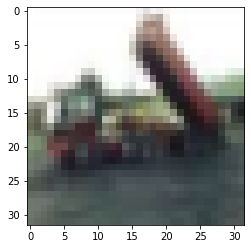

In [97]:
plt.imshow(X_train[2], cmap='gray')

In [106]:
X_train = X_train.astype('float32')/ 255.0
X_test = X_test.astype('float32')/ 255.0

In [98]:
X_train.shape

(50000, 32, 32, 3)

In [100]:
y_train.shape

(50000, 1)

In [109]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [110]:
y_train_cat.shape

(50000, 10)

In [102]:
X_test.shape

(10000, 32, 32, 3)

In [111]:
K.clear_session()

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Activation('relu'))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [112]:
model.summary()
model.fit(X_train, y_train_cat, batch_size=128,
          epochs=2, verbose=1, validation_split=0.3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
activation (Activation)      (None, 6, 6, 64)          0

In [105]:
model.evaluate(X_test, y_test_cat)

313/313 [==============================] - 3s 8ms/step - loss: 2.3012 - accuracy: 0.1133


[2.301208734512329, 0.11330000311136246]